In [1]:
# load the data from the last time
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
from matplotlib import cm


In [4]:
data = pd.read_csv('data/experiment-2021-10-22 18:40:08.560774.csv')#, sep='\t')
# data.columns = ['Unnamed: 0', 'FS Load From BQ', 'n_features', 'n_predictions',
#        'n_workers', 'total_seconds', 'response_ms', 'per_prediction']

In [5]:
data.head()

,Unnamed: 0,create_stats,n_features,n_predictions,n_workers,total_seconds
0,0,379.160968,80,7,5,0.264481
1,1,379.160968,80,7,5,0.198861
2,2,379.160968,80,7,5,0.173092
3,3,379.160968,80,7,5,0.189489
4,4,379.160968,80,7,5,0.207530


In [6]:
#prep the data

data['ms_per_entity'] = data['total_seconds'] / data['n_predictions'] * 1000
data['total_ms'] = data['total_seconds'] * 1000
data.head()

,Unnamed: 0,create_stats,n_features,n_predictions,n_workers,total_seconds,ms_per_entity,total_ms
0,0,379.160968,80,7,5,0.264481,37.783010,264.481068
1,1,379.160968,80,7,5,0.198861,28.408732,198.861122
2,2,379.160968,80,7,5,0.173092,24.727481,173.092365
3,3,379.160968,80,7,5,0.189489,27.069909,189.489365
4,4,379.160968,80,7,5,0.207530,29.647180,207.530260


In [7]:
# ols model

model = ols("""total_ms ~ n_features + n_predictions + n_workers + 
            n_features*n_predictions + n_features*n_workers + 
            n_predictions*n_workers
            """, data=data).fit()

table = sm.stats.anova_lm(model, typ=3)
table


,sum_sq,df,F,PR(>F)
Intercept,6.837809e+03,1.0,2.476216,0.115712
n_features,4.542974e+03,1.0,1.645174,0.199741
n_predictions,1.007644e+03,1.0,0.364904,0.545852
n_workers,2.890250e+03,1.0,1.046663,0.306380
n_features:n_predictions,1.613157e+03,1.0,0.584182,0.444753
n_features:n_workers,2.695223e+03,1.0,0.976037,0.323279
n_predictions:n_workers,1.441526e+03,1.0,0.522028,0.470048
Residual,6.608016e+06,2393.0,NaN,NaN


In [8]:
#create data aggregates for visualisation

def p90(g):
    return np.percentile(g, 90)

data_avg = pd.pivot_table(data, 'ms_per_entity', index=['n_workers','n_features', 'n_predictions'], aggfunc=np.average)
data_med = pd.pivot_table(data, 'ms_per_entity', index=['n_workers','n_features', 'n_predictions'], aggfunc=np.median)
data_p90 = pd.pivot_table(data, 'ms_per_entity', index=['n_workers','n_features', 'n_predictions'], aggfunc=p90)
data_avg = data_avg.reset_index()
data_med = data_med.reset_index()
data_p90 = data_p90.reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  from ipykernel import kernelapp as app


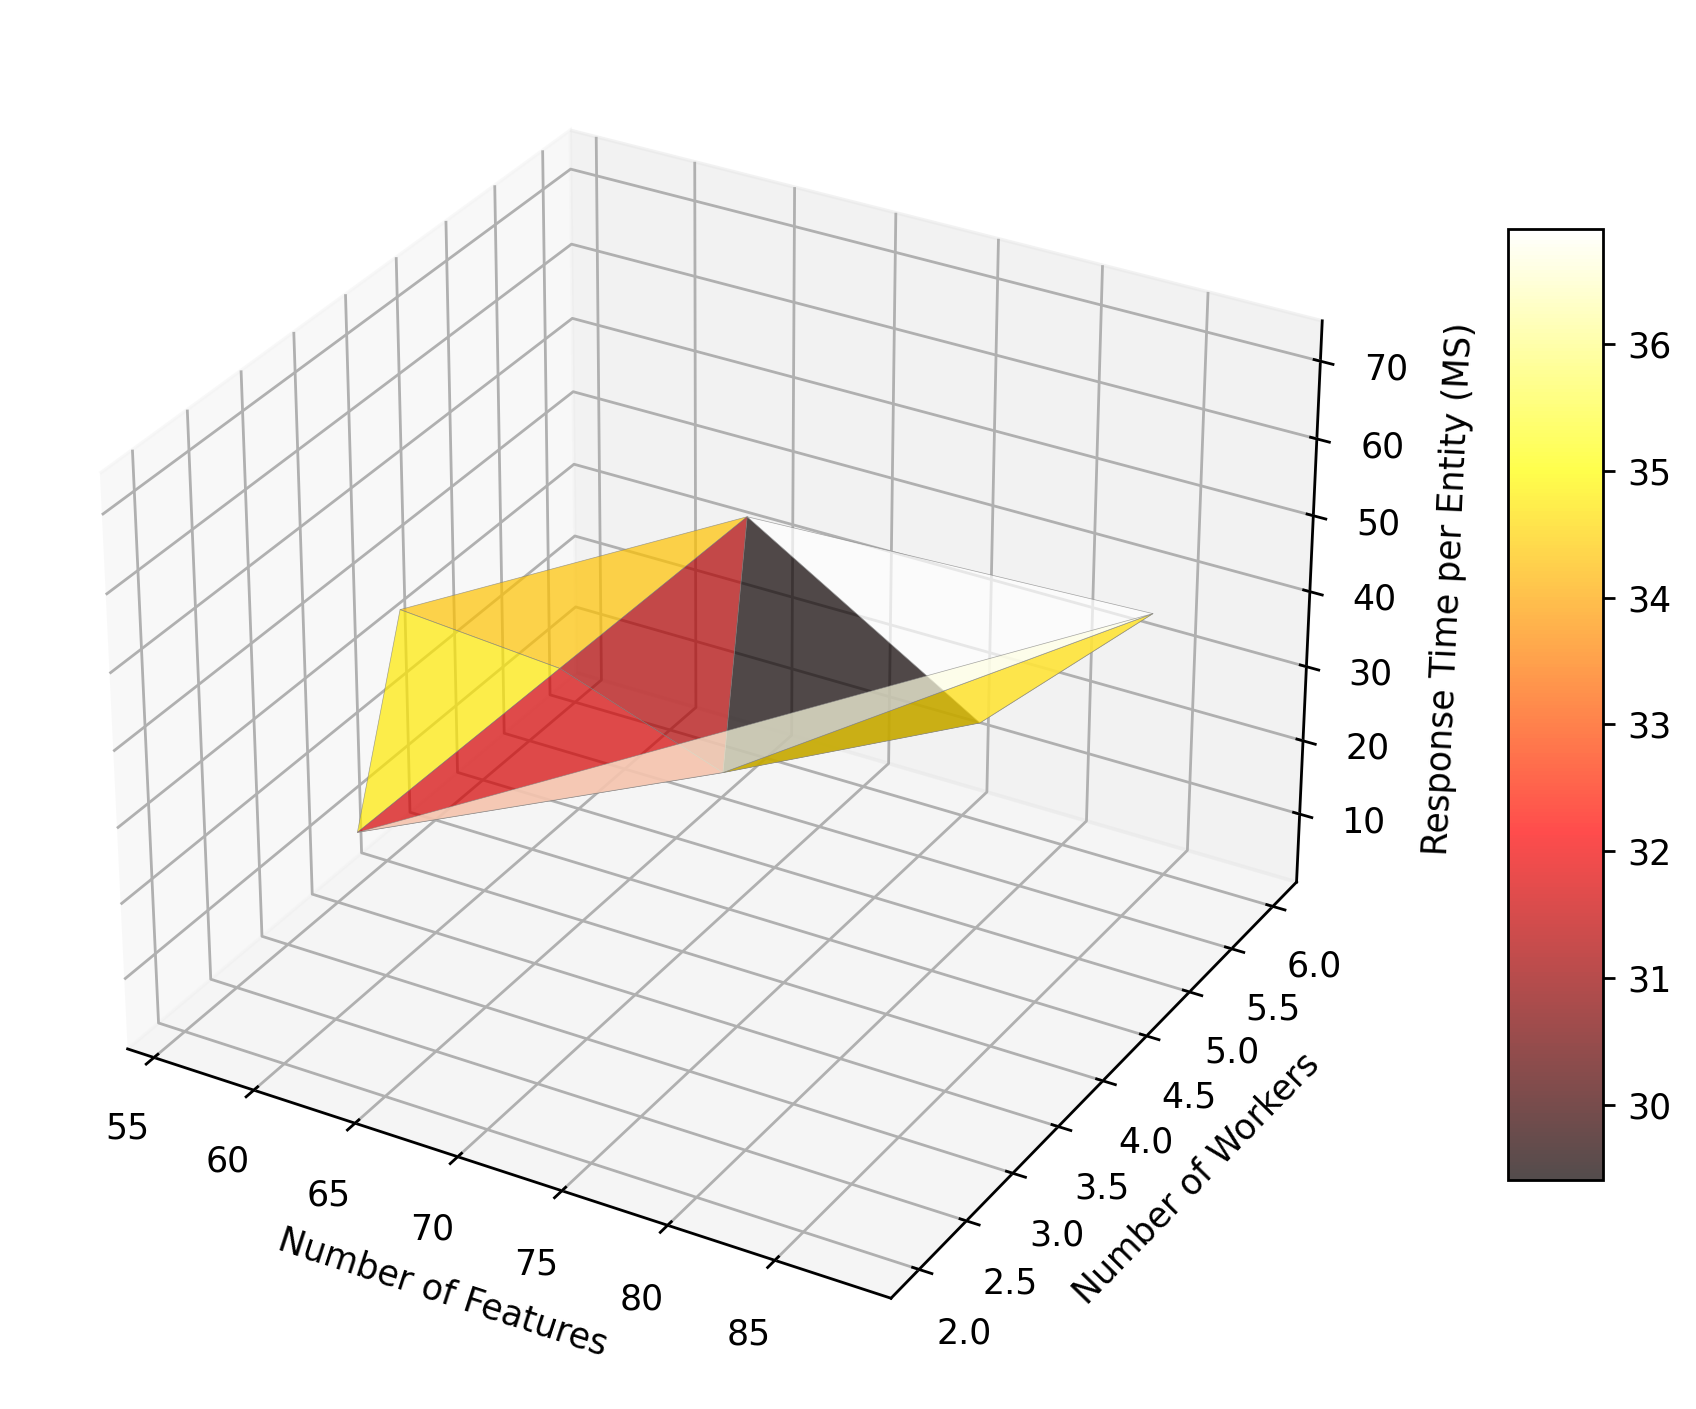

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


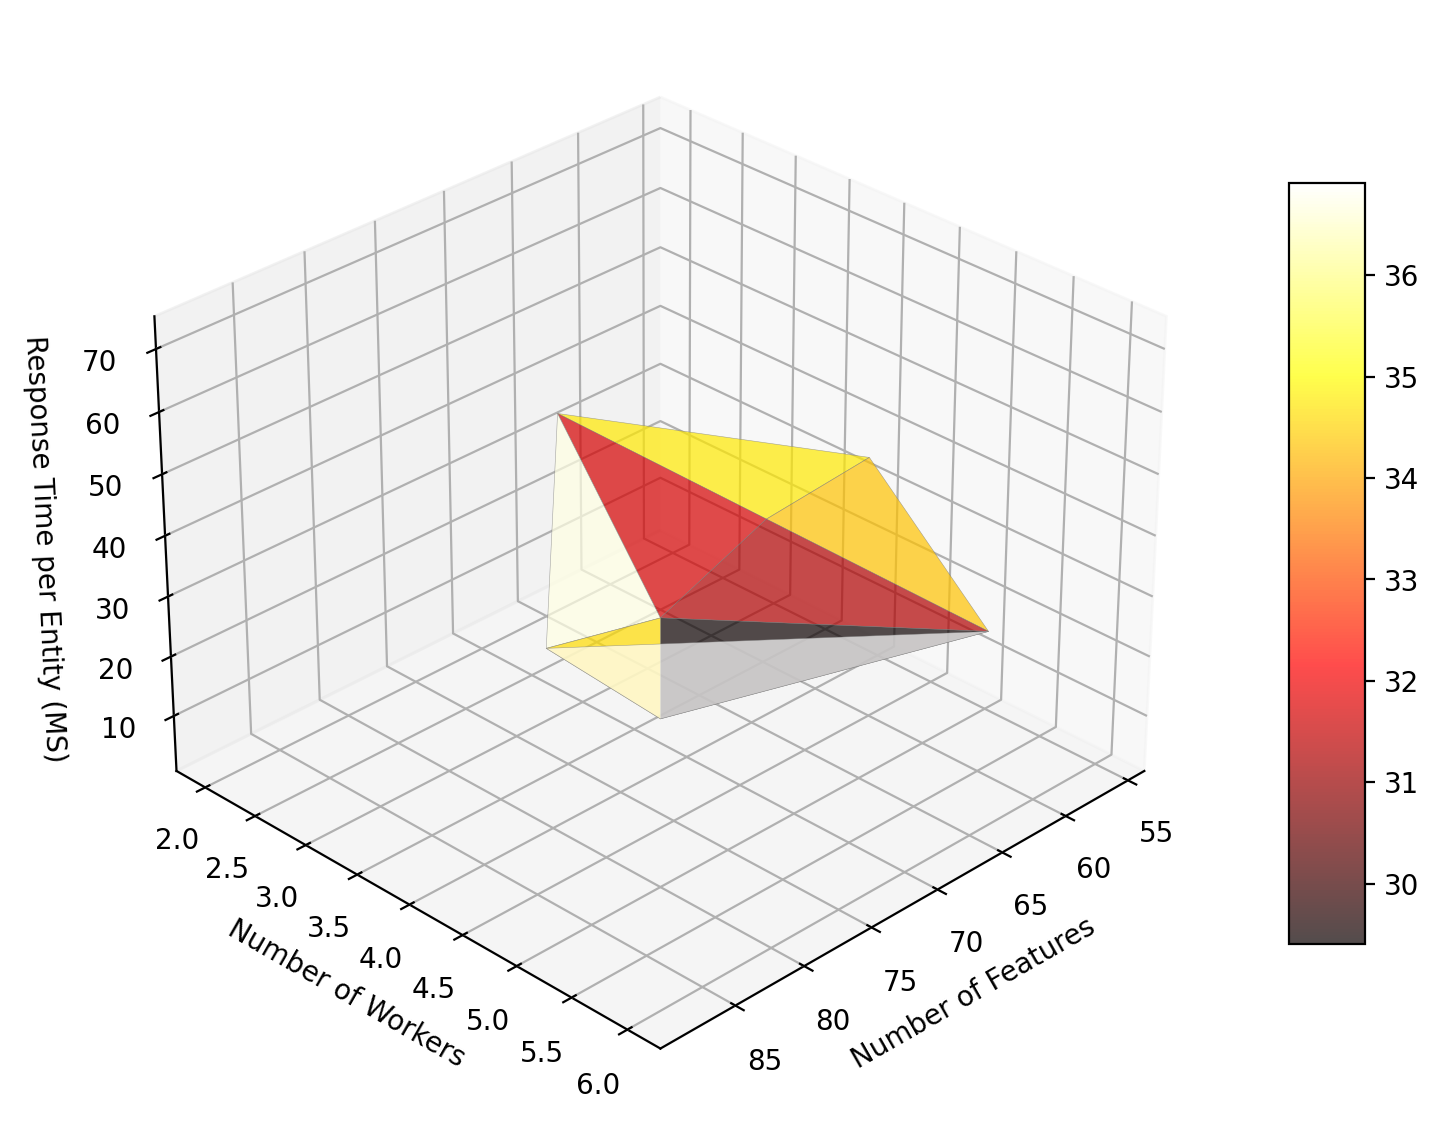

In [9]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LightSource


light = (90, 20)
figsize=(16*.8,9*.8)
my_cmap = plt.get_cmap('hot')
# Make the plot
fig = plt.figure(figsize=figsize, dpi=250)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data['n_features'], data['n_workers'], data['ms_per_entity'], cmap=my_cmap, 
                          linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Workers')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )
plt.show()
 
# Rotate it
fig = plt.figure(figsize=figsize, dpi=200)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data['n_features'], data['n_workers'], data['ms_per_entity']
                          , cmap=my_cmap, linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.view_init(30, 45)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Workers')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )

plt.show()
 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


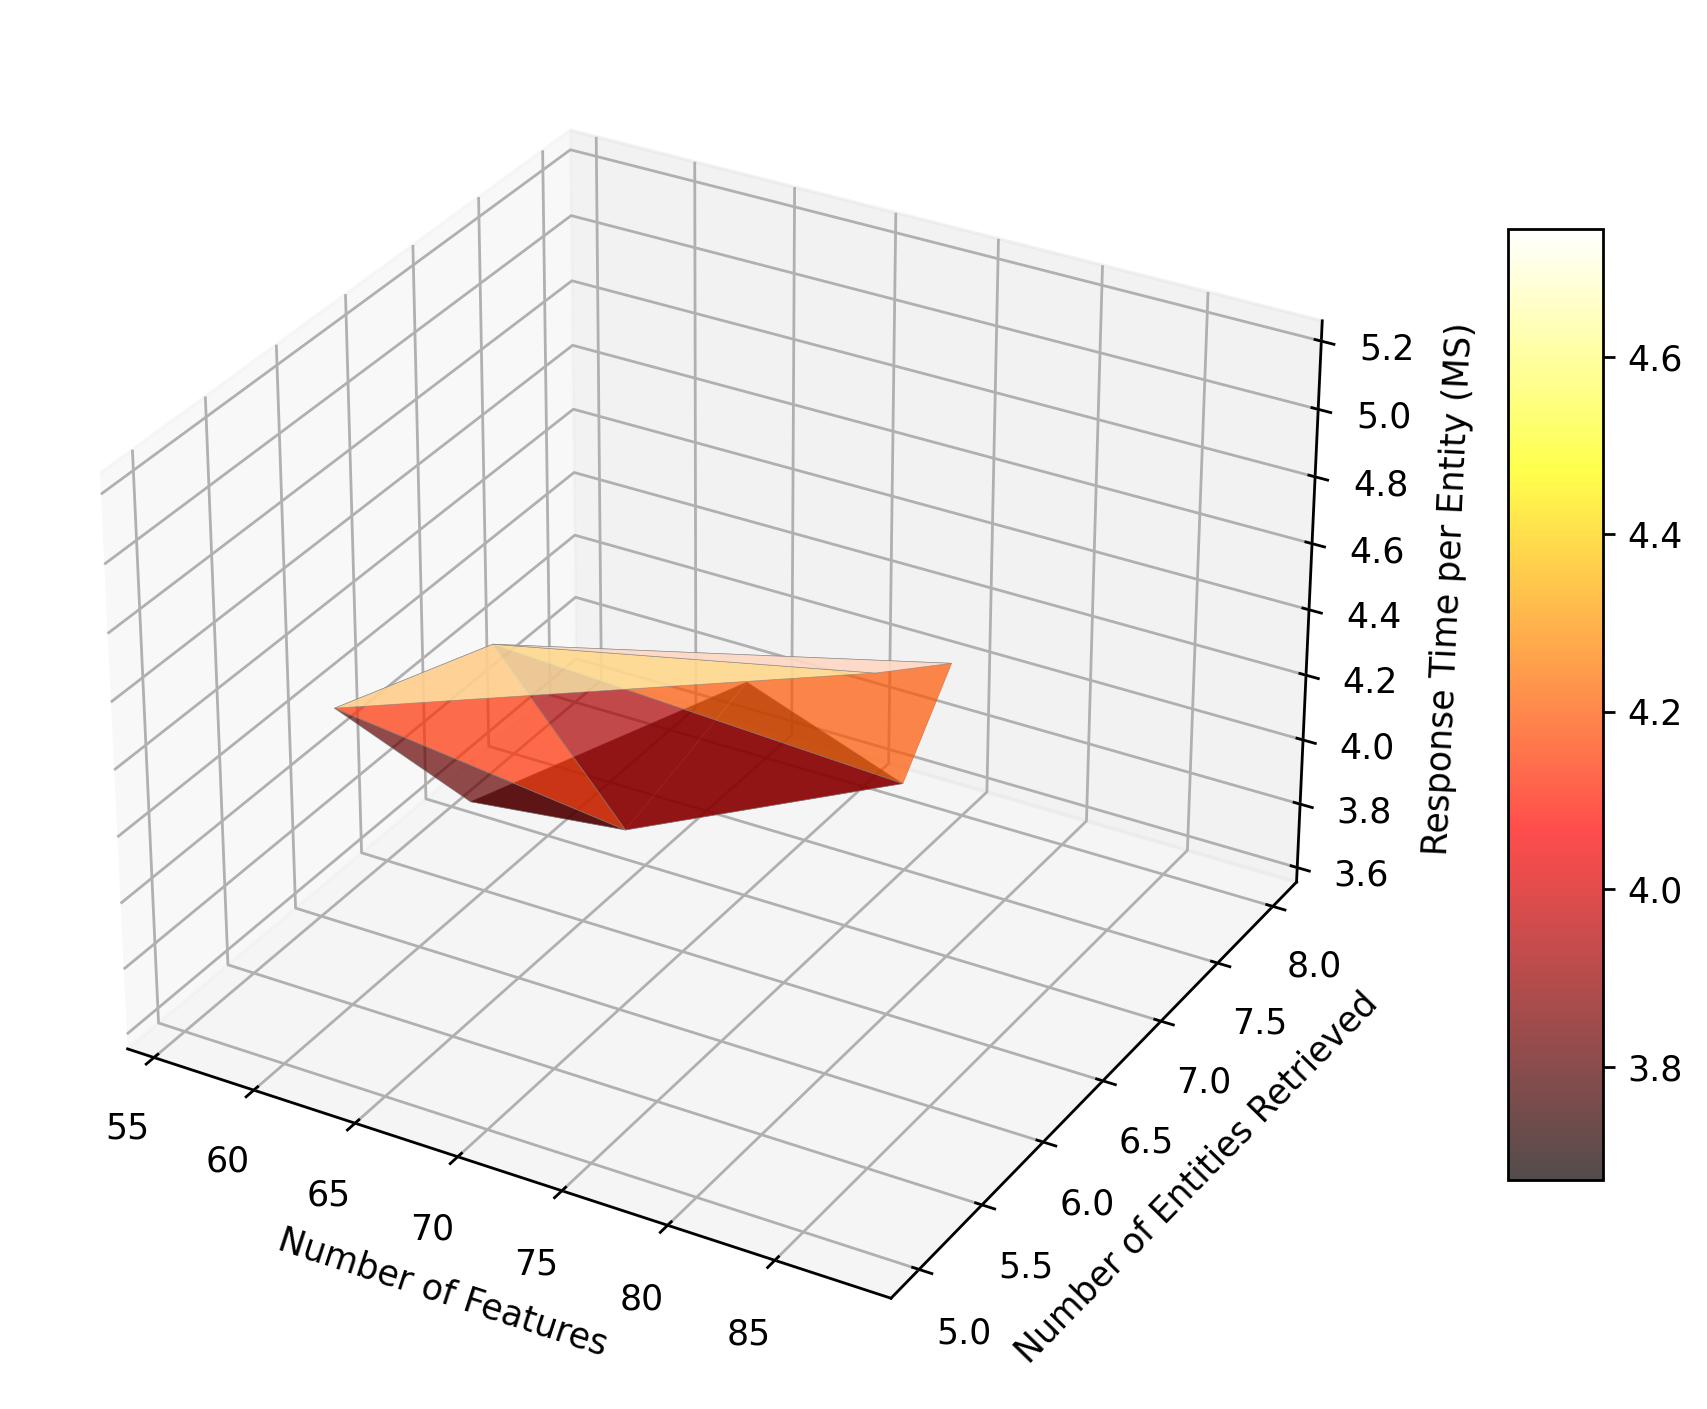

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


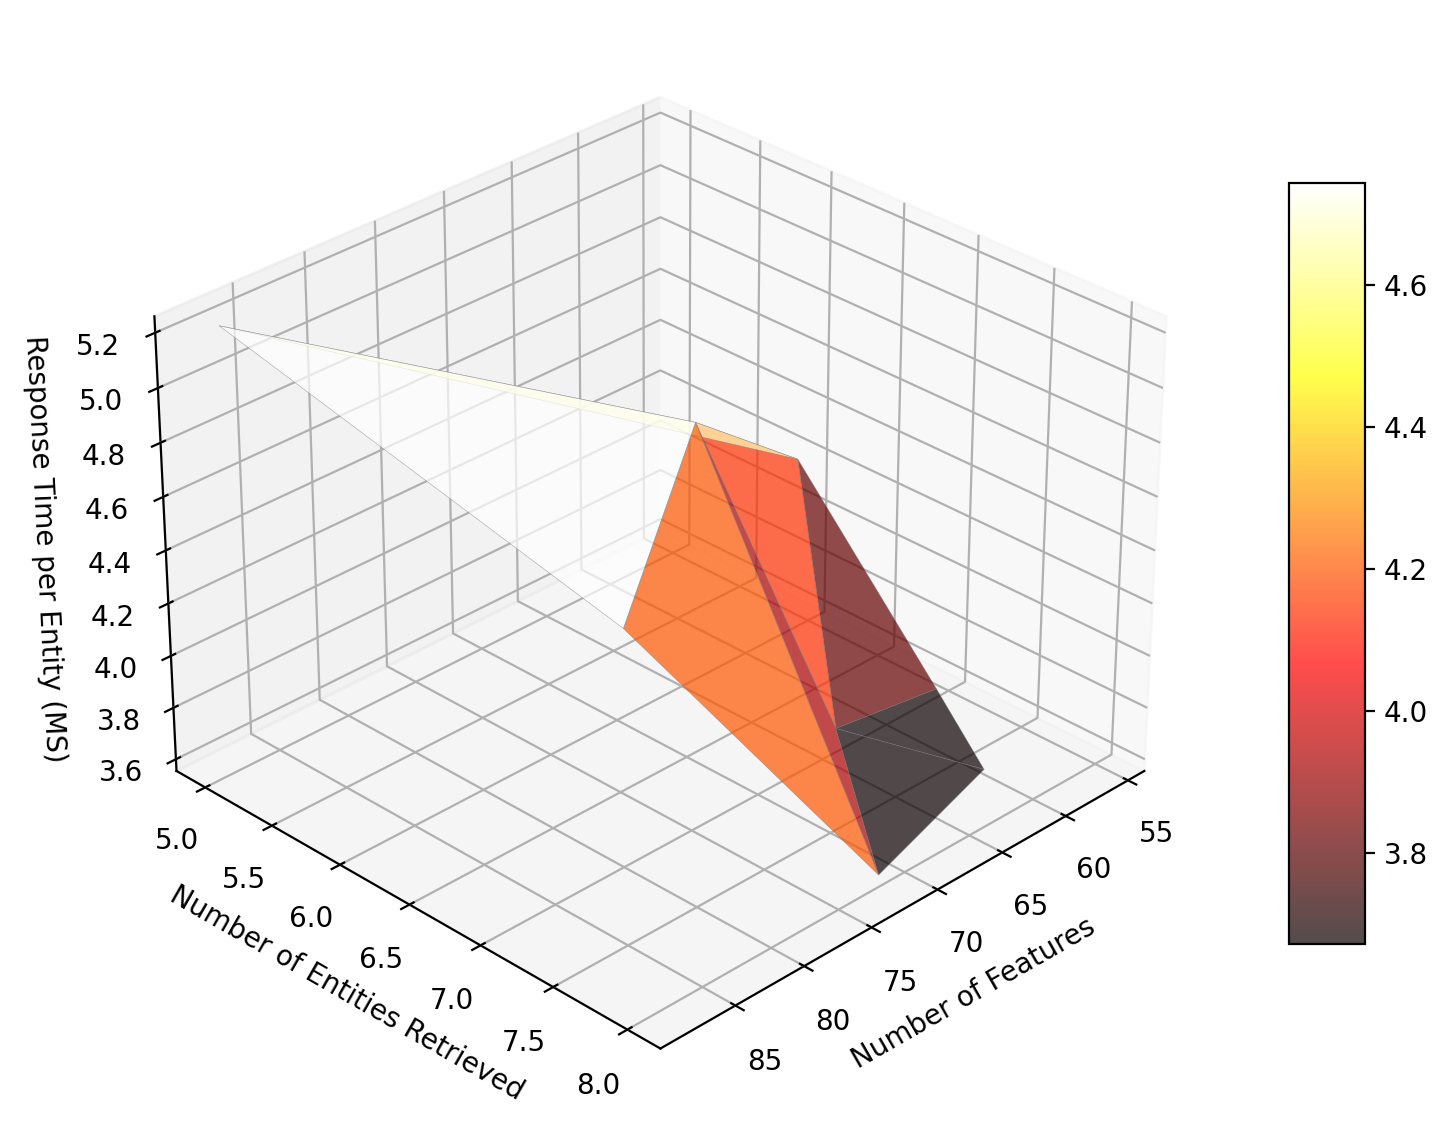

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LightSource


light = (90, 20)
figsize=(16*.8,9*.8)
my_cmap = plt.get_cmap('hot')
# Make the plot
fig = plt.figure(figsize=figsize, dpi=250)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data_med['n_features'], data_med['n_predictions'], data_med['ms_per_entity'], cmap=my_cmap, 
                          linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Entities Retrieved')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )
plt.show()
 
# Rotate it
fig = plt.figure(figsize=figsize, dpi=200)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data_med['n_features'], data_med['n_predictions'], data_med['ms_per_entity']
                          , cmap=my_cmap, linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.view_init(30, 45)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Entities Retrieved')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


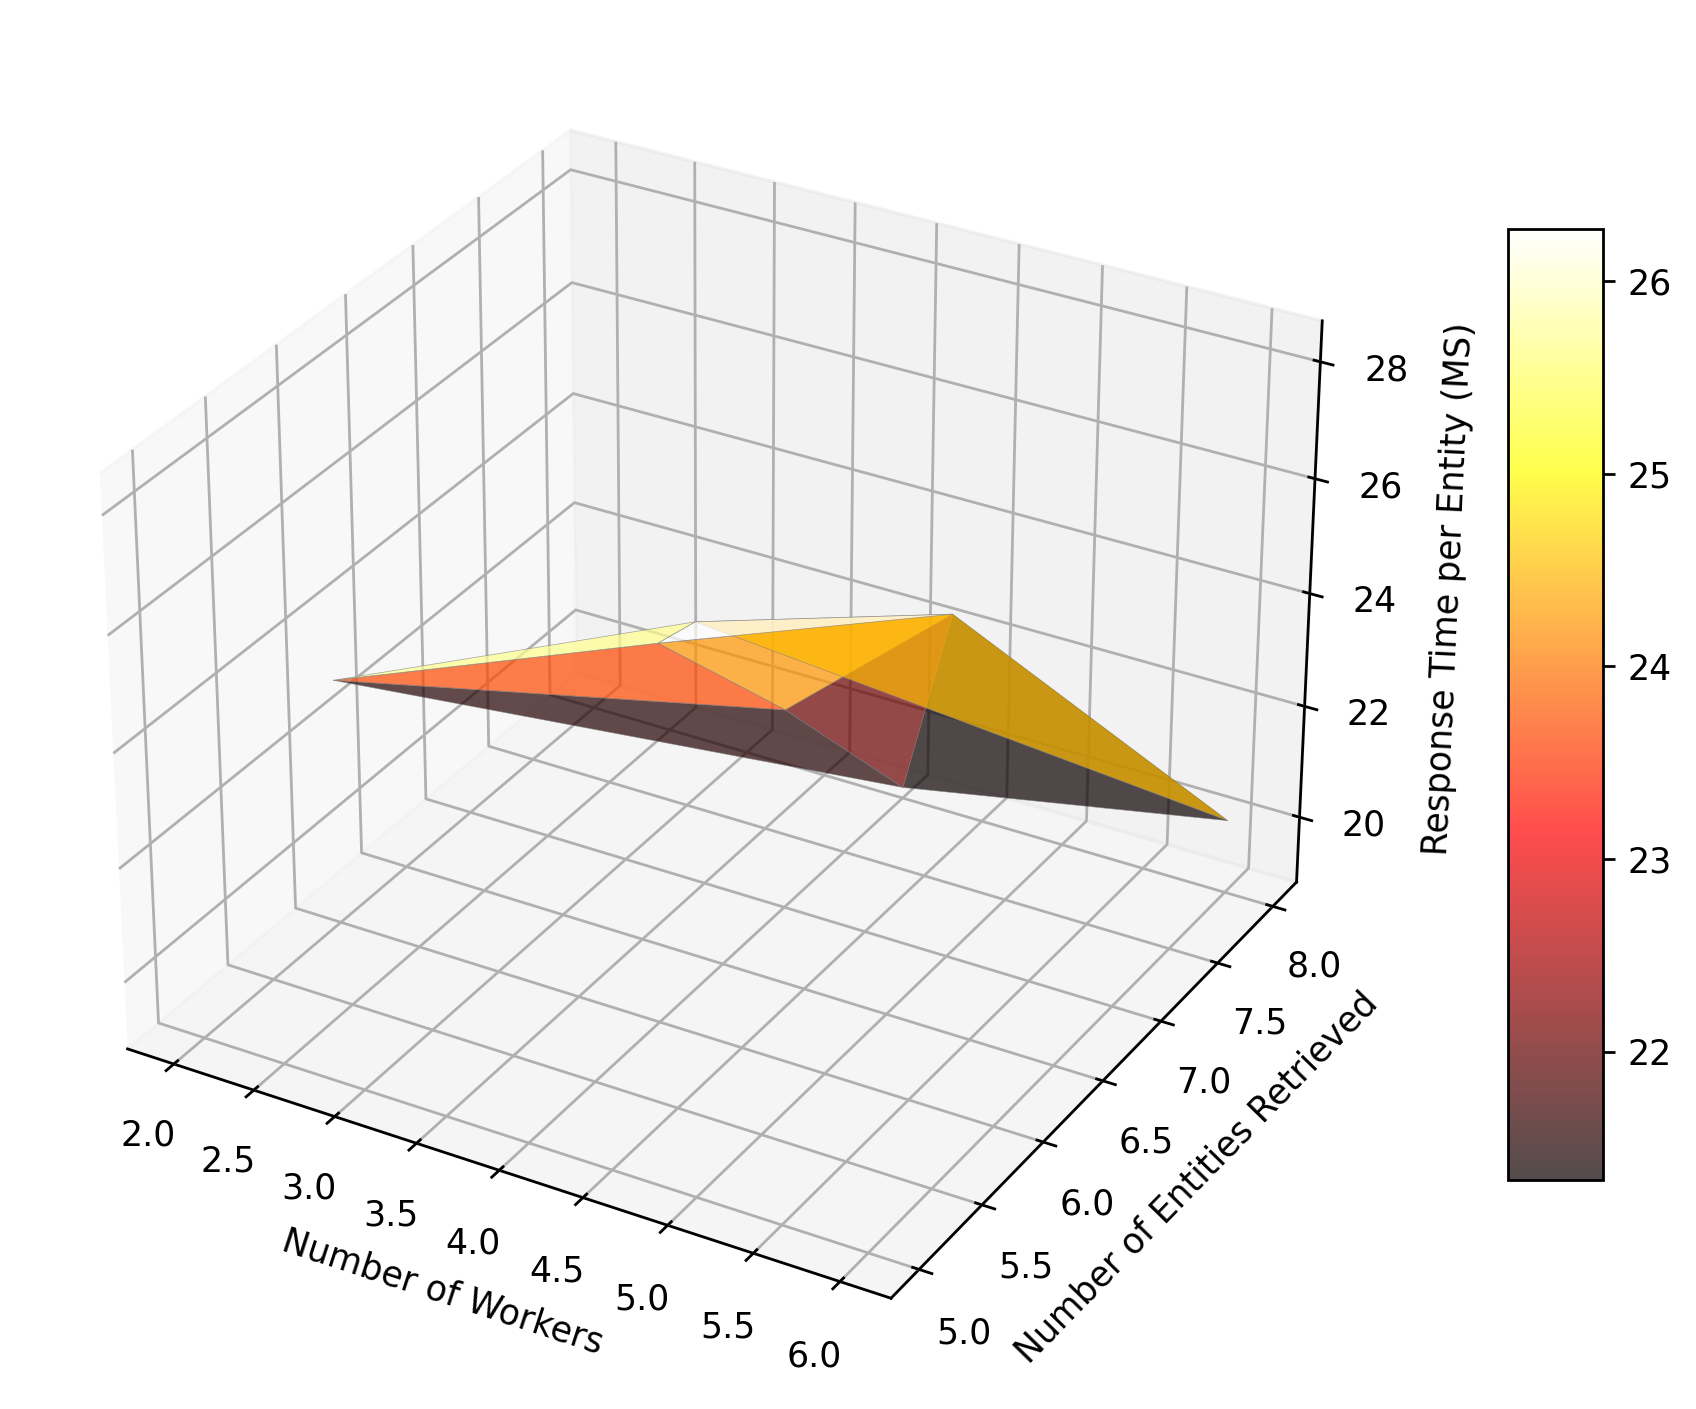

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


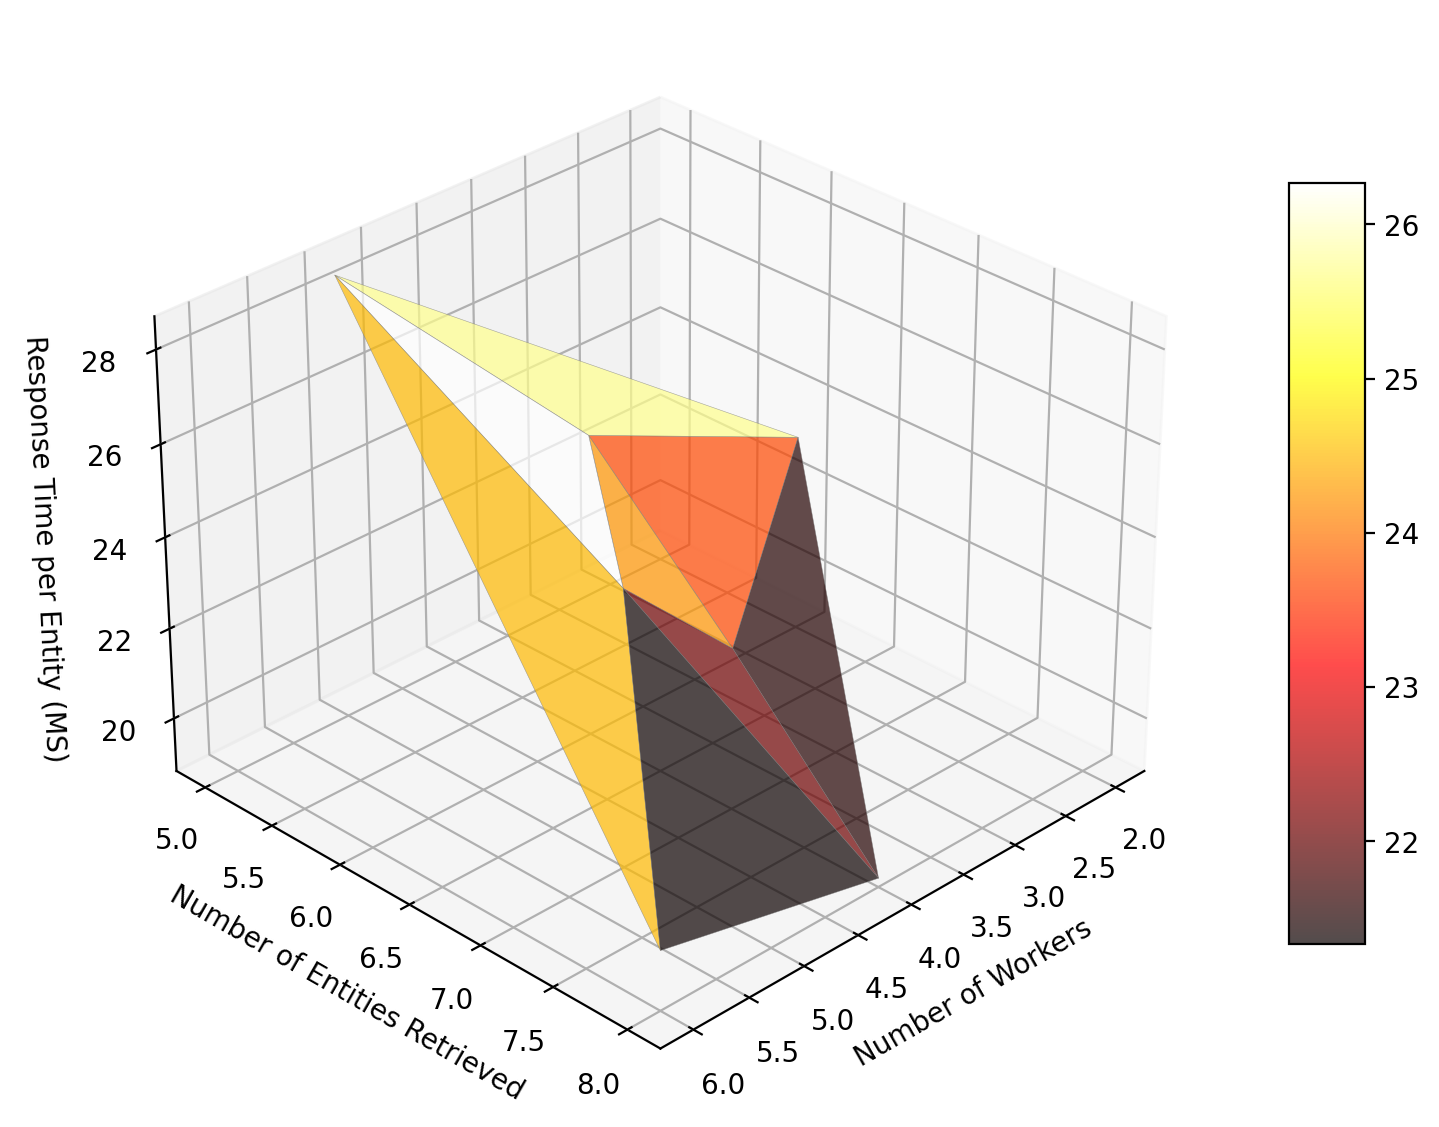

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LightSource


light = (90, 20)
figsize=(16*.8,9*.8)
my_cmap = plt.get_cmap('hot')
# Make the plot
fig = plt.figure(figsize=figsize, dpi=250)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data_p90['n_workers'], data_p90['n_predictions'], data_p90['ms_per_entity'], cmap=my_cmap, 
                          linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.set_xlabel('Number of Workers')
ax.set_ylabel('Number of Entities Retrieved')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )
plt.show()
 
# Rotate it
fig = plt.figure(figsize=figsize, dpi=200)
ax = fig.gca(projection='3d')
trisurf = ax.plot_trisurf(data_p90['n_workers'], data_p90['n_predictions'], data_p90['ms_per_entity']
                          , cmap=my_cmap, linewidth=0.2, alpha=0.7, antialiased = True,
                         edgecolor = 'grey', lightsource=light)
ax.view_init(30, 45)
ax.set_xlabel('Number of Workers')
ax.set_ylabel('Number of Entities Retrieved')
ax.set_zlabel('Response Time per Entity (MS)')
fig.colorbar(trisurf, ax = ax, shrink = 0.7, aspect = 10 )

plt.show()

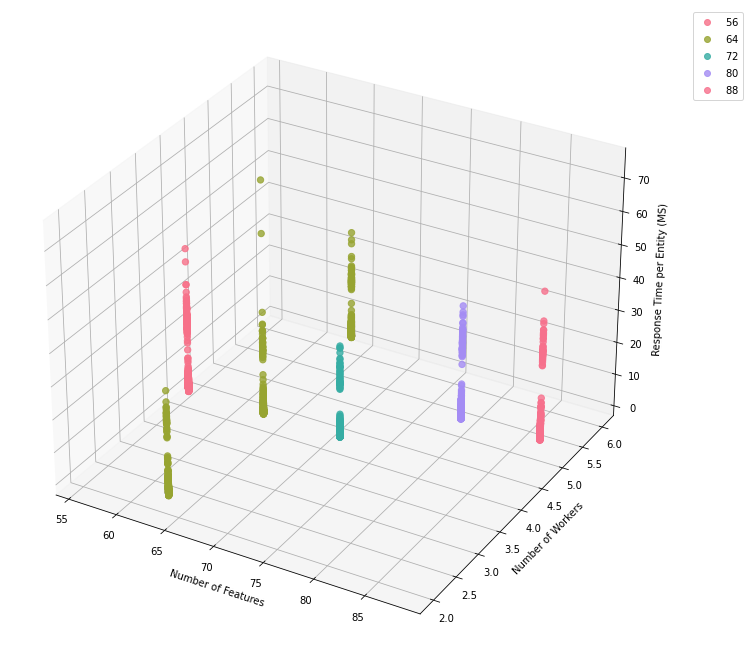

In [12]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = data['n_features']
y = data['n_workers']
z = data['ms_per_entity']

# axes instance
fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=.8)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Workers')
ax.set_zlabel('Response Time per Entity (MS)')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

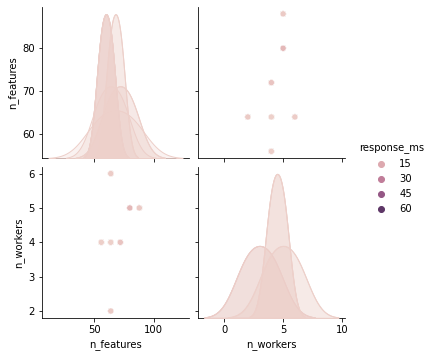

In [13]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['n_features'] = x
df_3d['n_workers'] = y
d
df_3d['response_ms'] = z

sns.pairplot(df_3d, hue='response_ms')